In [1]:
import numpy as np
import pandas as pd
import platform
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Experimental data

In [2]:
data_folder = 'data'
oxigen_file = 'BCH-1438_Expt_O2.xls'
temperature_file = 'BCH-1438_Expt_Temp.xls'

In [3]:
platform_system = platform.system()
file_separator=''
if(platform_system=='Windows'):
    file_separator = '\\'
elif(platform_system=='Linux'):
    file_separator = '/'

In [4]:
oxigen_path =data_folder + file_separator + oxigen_file
temperature_path =data_folder + file_separator + temperature_file

In [5]:
oxigen_data = pd.read_excel(oxigen_path)
temperature_data = pd.read_excel(temperature_path)

In [6]:
print(oxigen_data.columns)
print(temperature_data.columns)

Index(['Time [min]', 'O2-01', 'O2-02', 'O2-03', 'O2-04', 'O2-05', 'O2-06',
       'O2-07', 'O2-08', 'O2-09', 'O2-10', 'O2-11', 'O2-12', 'O2-13', 'O2-14',
       'O2-15', 'O2-16', 'O2-17', 'O2-18'],
      dtype='object')
Index(['Time [min]', 'Temp_01', 'Temp_02', 'Temp_03', 'Temp_04', 'Temp_05',
       'Temp_06', 'Temp_07', 'Temp_08', 'Temp_09', 'Temp_10', 'Temp_11',
       'Temp_12', 'Temp_13', 'Temp_14', 'Temp_15', 'Temp_16', 'Temp_17',
       'Temp_18'],
      dtype='object')


In [7]:
oxigen_data.head(1)

,Time [min],O2-01,O2-02,O2-03,O2-04,O2-05,O2-06,O2-07,O2-08,O2-09,O2-10,O2-11,O2-12,O2-13,O2-14,O2-15,O2-16,O2-17,O2-18
0,0,20.84125,20.990333,20.885833,20.9325,20.961583,20.911667,20.957333,21.110833,20.968786,21.06381,20.99389,21.157397,20.98792,21.010186,21.102997,20.980817,20.98,20.965


In [8]:
temperature_data.head(1)

,Time [min],Temp_01,Temp_02,Temp_03,Temp_04,Temp_05,Temp_06,Temp_07,Temp_08,Temp_09,Temp_10,Temp_11,Temp_12,Temp_13,Temp_14,Temp_15,Temp_16,Temp_17,Temp_18
0,0,19.5,19.0,NaN,21.6,19.9,NaN,19.6,NaN,19.0,20.216667,NaN,19.9,19.7,19.3,NaN,20.2,20.108333,NaN


# Recreating the experimental plots
## $O_2$ Levels

In [9]:
x_values = oxigen_data['Time [min]']

Text(0.5, 1.0, '$O_2$ Volume fraction')

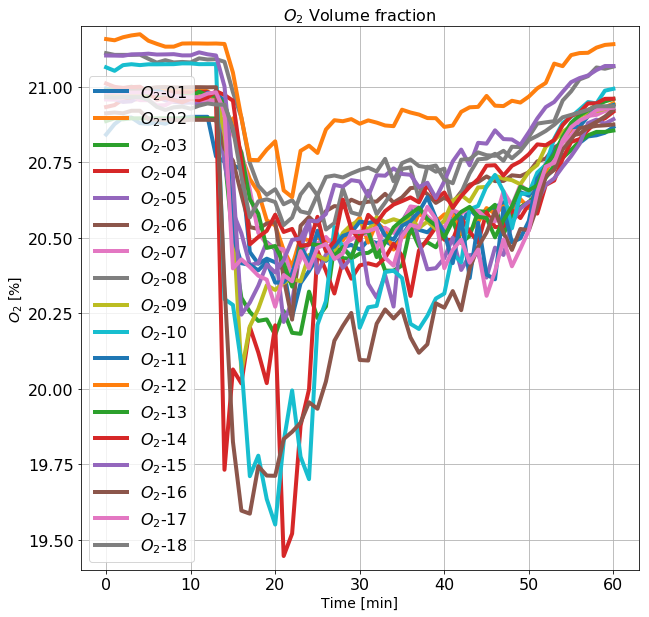

In [10]:
fig = plt.figure(figsize=(10,10))
for i in range(1,oxigen_data.shape[1]):
    header = oxigen_data.columns[i]
    oxigen_values = oxigen_data[header]
    header = r'$O_2$'+header[2:]
    plt.plot(x_values, oxigen_values, label=r''+header, linewidth =4)
plt.ylabel(r'$O_2$ [%]',fontsize='14')
plt.xlabel(r'Time [min]',fontsize='14')
plt.tick_params(labelsize=16)
plt.legend(fontsize='16')
plt.grid()
plt.ylim(19.4,21.2)
plt.title(r'$O_2$ Volume fraction', fontsize='16')

In [11]:
detectors = np.arange(18)+1
levels = np.array([detectors[:6],detectors[6:12],detectors[12:]])
print(np.shape(levels))

(3, 6)


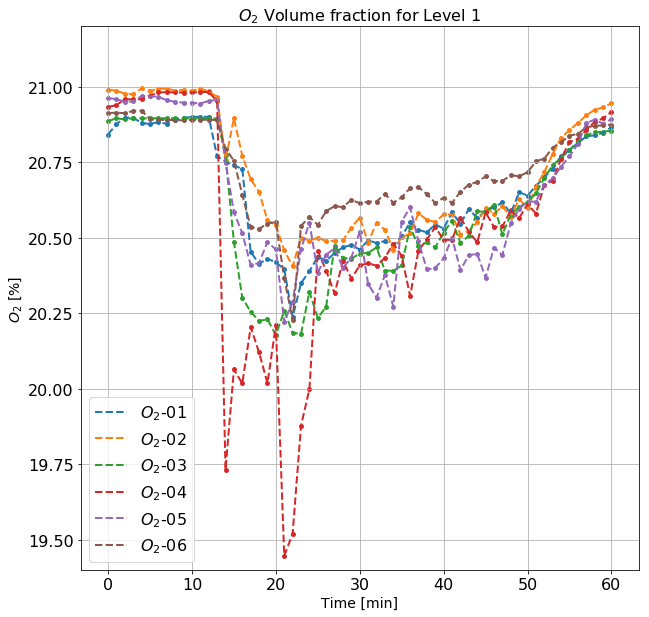

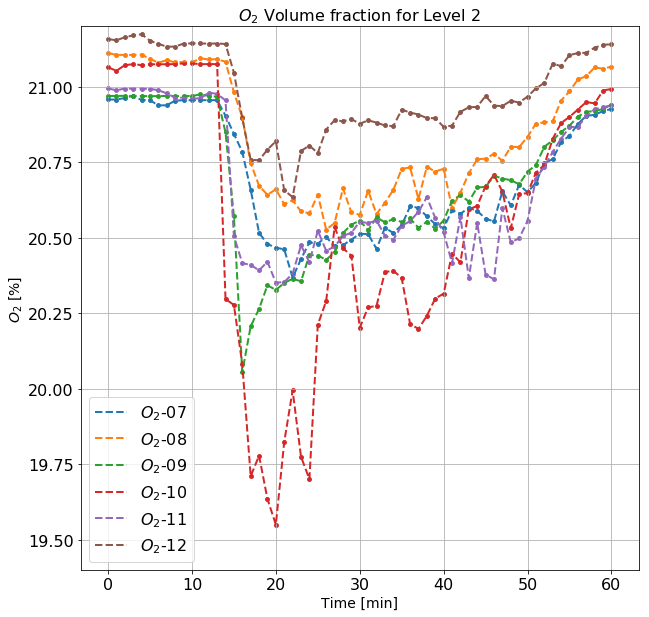

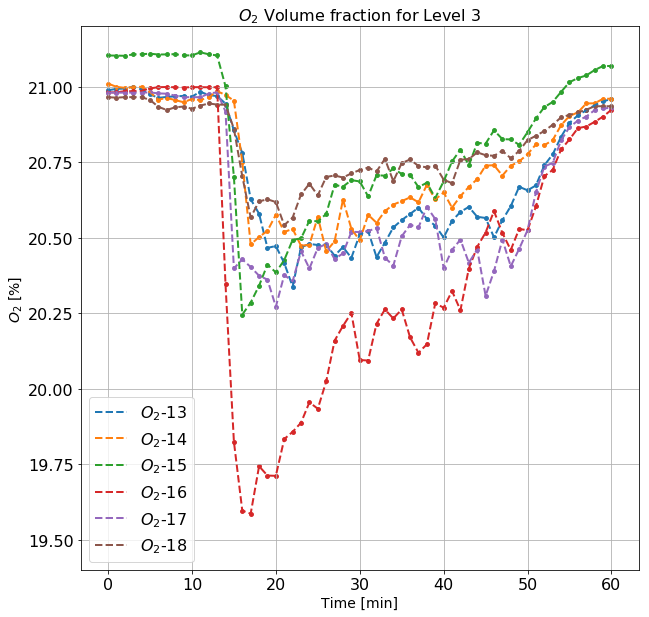

In [62]:
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = oxigen_data.columns[i]
        oxigen_values = oxigen_data[header]
        header = r'$O_2$'+header[2:]
        plt.scatter(x_values, oxigen_values,s=15, label=None)#, label='Group '+str(group_number))
        plt.plot(x_values, oxigen_values, label=r''+header, linewidth =2,linestyle='--')
    plt.ylabel(r'$O_2$ [%]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    plt.ylim(19.4,21.2)
    plt.title(r'$O_2$ Volume fraction for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'O2_only_exp_level_'+str(j+1)+'.png')

## Temperature

In [13]:
x_values = temperature_data['Time [min]']

Temp_03 has NaN values
Temp_06 has NaN values
Temp_08 has NaN values
Temp_11 has NaN values
Temp_15 has NaN values
Temp_18 has NaN values


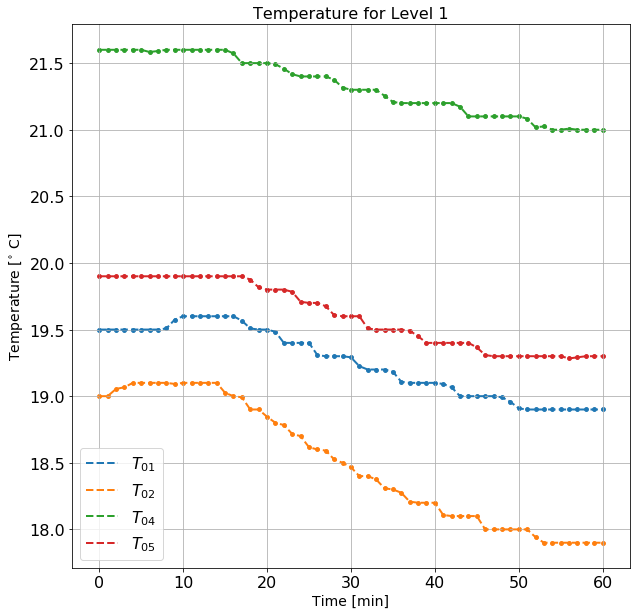

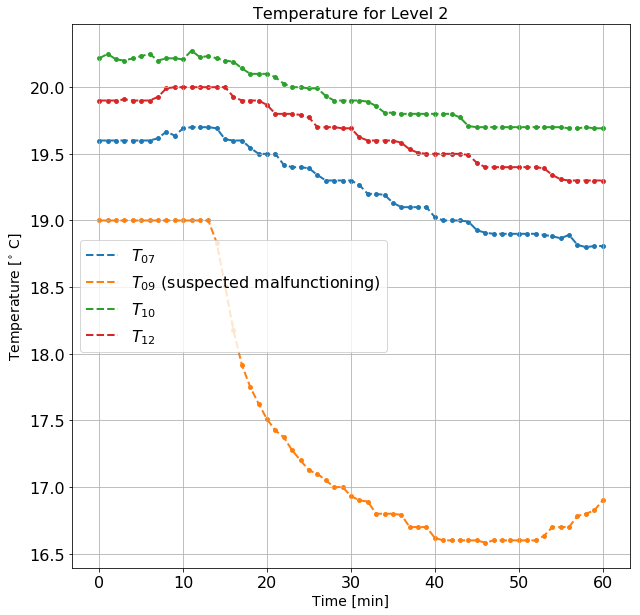

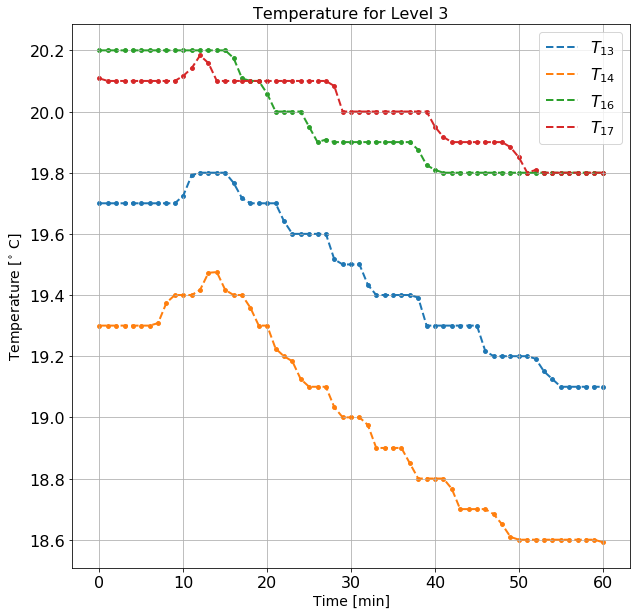

In [64]:
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = temperature_data.columns[i]
        temperature_values = temperature_data[header]
        if(temperature_values.isnull().values.any()):
            print(header + ' has NaN values')
        else:
            if(header =='Temp_09'):
                header = r'$T_{'+header[5:]+'}$ (suspected malfunctioning)'
            else:
                header = r'$T_{'+header[5:]+'}$'
            plt.scatter(x_values, temperature_values,s=15, label=None)#, label='Group '+str(group_number))
            plt.plot(x_values, temperature_values, label=r''+header, linewidth =2,linestyle='--')
    plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'Temperature for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'Temp_only_exp_level_'+str(j+1)+'.png')

# Loading the simulation results

![about_sim.png](about_sim.png)

In [15]:
sim_number = 2
time_step_s = 0.23
n_time_steps = 44
time_shift = 14
time_shift_sim_4 = 37

In [16]:
simulation_folder_sim_2 =data_folder + file_separator + 'simulation_2' + file_separator +'txt_file_for_comparison'
simulation_folder_sim_4 =data_folder + file_separator + 'simulation_4' + file_separator +'txt_files'

In [17]:
files_sim_2 = glob.glob(simulation_folder_sim_2+file_separator+'*.txt')
files_sim_2.sort()
files_sim_4 = glob.glob(simulation_folder_sim_4+file_separator+'*.txt')
files_sim_4.sort()

In [18]:
print('Files to process: ',np.shape(files_sim_2)[0],np.shape(files_sim_4)[0])

Files to process:  223 222


### Getting the data of the simulations

### Simulation 2

In [19]:
full_path = files_sim_2[0]
path, filename = os.path.split(full_path)
filename, file_extension = os.path.splitext(filename)
time_step_number = int(filename.split(sep='-')[1])
time_seconds = time_step_number*time_step_s
time_min = time_seconds//60
time_real = time_min + time_shift

In [20]:
print(time_step_number,time_seconds,time_min,time_real)

44 10.120000000000001 0.0 14.0


In [21]:
simulation_data = pd.read_csv(full_path,delim_whitespace=True)

In [22]:
print(simulation_data.shape)
print(simulation_data.columns)

(18, 11)
Index(['nodenumber', 'x-coordinate', 'y-coordinate', 'z-coordinate',
       'pressure', 'dynamic-pressure', 'absolute-pressure', 'total-pressure',
       'temperature', 'total-temperature', 'phase-1-vof'],
      dtype='object')


## Checking the order of the node-numbers

In [23]:
nodes_number = simulation_data['nodenumber'].values
exp_data = pd.DataFrame(data=nodes_number,columns=['nodenumber'])

In [24]:
exp_data['x-coordinate'] = [0.45,2.64,4.85,6.55,4.77,3.04,0.45,2.64,4.85,6.55,4.77,3.04,0.45,2.64,4.85,6.55,4.77,3.04]
exp_data['y-coordinate'] = [1.18,2.09,1.93,1.15,0.26,0.25,1.18,2.09,1.93,1.15,0.26,0.25,1.18,2.09,1.93,1.15,0.26,0.25]
exp_data['z-coordinate'] = [0.7,0.7,0.7,0.7,0.7,0.7,1.3,1.3,1.3,1.3,1.3,1.3,1.7,1.7,1.7,1.7,1.7,1.7]

In [25]:
def order_node_number(simulation_data,exp_data):
    simulation_data.rename(columns={'y-coordinate':'z-coordinate','z-coordinate':'x-coordinate','x-coordinate':'y-coordinate'}, inplace=True)
    simulation_data[['nodenumber','x-coordinate','y-coordinate', 'z-coordinate']] = simulation_data[['nodenumber','x-coordinate','y-coordinate', 'z-coordinate']].round(2)
    for index_exp, row in exp_data.iterrows():
        desired_node = simulation_data[(simulation_data[['x-coordinate']].values==row[['x-coordinate']].values)
                   & (simulation_data[['y-coordinate']].values==row[['y-coordinate']].values)
                   & (simulation_data[['z-coordinate']].values==row[['z-coordinate']].values)]
        desired_node.replace({int(desired_node[['nodenumber']].values):int(row[['nodenumber']].values)})
        new_column = pd.Series([row[['nodenumber']].values[0]], name='nodenumber', index=[desired_node.index.values[0]])
        simulation_data.update(new_column)
    simulation_data = simulation_data.sort_values('nodenumber')
    simulation_data = simulation_data.reset_index(drop=True)
    return simulation_data

In [26]:
oxigen_data_sim_2 = pd.DataFrame(columns=oxigen_data.columns)
temperature_data_sim_2 = pd.DataFrame(columns=temperature_data.columns)
temperature_total_data_sim_2 = pd.DataFrame(columns=temperature_data.columns)

In [27]:
node_numbers = ((simulation_data['nodenumber'].values))

In [28]:
x_coordinate_sim_2 = pd.DataFrame(columns = node_numbers)
y_coordinate_sim_2 = pd.DataFrame(columns = node_numbers)
z_coordinate_sim_2 = pd.DataFrame(columns = node_numbers)
pressure_sim_2 = pd.DataFrame(columns = node_numbers)
dynamic_pressure_sim_2 = pd.DataFrame(columns = node_numbers)
absolute_pressure_sim_2 = pd.DataFrame(columns = node_numbers)
total_pressure_sim_2 = pd.DataFrame(columns = node_numbers)

In [29]:
x_coordinate_sim_2.insert(loc=0, column='Time [min]',value=[])
y_coordinate_sim_2.insert(loc=0, column='Time [min]',value=[])
z_coordinate_sim_2.insert(loc=0, column='Time [min]',value=[])
pressure_sim_2.insert(loc=0, column='Time [min]',value=[])
dynamic_pressure_sim_2.insert(loc=0, column='Time [min]',value=[])
absolute_pressure_sim_2.insert(loc=0, column='Time [min]',value=[])
total_pressure_sim_2.insert(loc=0, column='Time [min]',value=[])

In [30]:
def append_column_to_row(dataframe_origin, dataframe_destination, column_name, first_column_value, index):
    """Extract the column from the dataframe, prepends a value and adds the row to the destination dataframe"""
    mini_row = dataframe_origin[column_name].values
    mini_row = np.insert(mini_row, 0, first_column_value, axis=0)
    dataframe_destination.loc[index] = mini_row

In [31]:
for i in range(np.shape(files_sim_2)[0]):
    file_sim = files_sim_2[i]
    path, filename = os.path.split(file_sim)
    filename, file_extension = os.path.splitext(filename)
    #print('Processing '+filename)
    time_step_number = int(filename.split(sep='-')[1])
    time_seconds = time_step_number*time_step_s
    time_min = time_seconds/60.0
    time_real = time_min + time_shift
    simulation_data = pd.read_csv(file_sim, delim_whitespace=True)
    simulation_data=order_node_number(simulation_data,exp_data)
    append_column_to_row(simulation_data,oxigen_data_sim_2,'phase-1-vof',time_real,i)
    append_column_to_row(simulation_data,temperature_data_sim_2,'temperature',time_real,i)
    append_column_to_row(simulation_data,temperature_total_data_sim_2,'total-temperature',time_real,i)
    append_column_to_row(simulation_data,x_coordinate_sim_2,'x-coordinate',time_real,i)
    append_column_to_row(simulation_data,y_coordinate_sim_2,'y-coordinate',time_real,i)
    append_column_to_row(simulation_data,z_coordinate_sim_2,'z-coordinate',time_real,i)
    append_column_to_row(simulation_data,pressure_sim_2,'pressure',time_real,i)
    append_column_to_row(simulation_data,dynamic_pressure_sim_2,'dynamic-pressure',time_real,i)
    append_column_to_row(simulation_data,absolute_pressure_sim_2,'absolute-pressure',time_real,i)
    append_column_to_row(simulation_data,total_pressure_sim_2,'total-pressure',time_real,i)

In [32]:
def prepend_time_zero_row(df):
    first_artificial = df.iloc[0].copy(deep=True).values
    first_artificial[0]=0.0 #changing the time
    df.loc[-1] = first_artificial  # adding a row
    df.index = df.index + 1  # shifting index
    df.sort_index(inplace=True) 

In [33]:
prepend_time_zero_row(oxigen_data_sim_2)
prepend_time_zero_row(temperature_data_sim_2)
prepend_time_zero_row(temperature_total_data_sim_2)
prepend_time_zero_row(x_coordinate_sim_2)
prepend_time_zero_row(y_coordinate_sim_2)
prepend_time_zero_row(z_coordinate_sim_2)
prepend_time_zero_row(pressure_sim_2)
prepend_time_zero_row(dynamic_pressure_sim_2)
prepend_time_zero_row(absolute_pressure_sim_2)
prepend_time_zero_row(total_pressure_sim_2)

### Simulation 4

In [34]:
full_path = files_sim_4[0]
simulation_data = pd.read_csv(full_path,delim_whitespace=True)
print(simulation_data.columns)

Index(['nodenumber', 'x-coordinate', 'y-coordinate', 'z-coordinate',
       'pressure', 'dynamic-pressure', 'absolute-pressure', 'total-pressure',
       'temperature', 'total-temperature', 'phase-1-density', 'phase-1-vof',
       'phase-2-density', 'phase-2-vof'],
      dtype='object')


In [35]:
oxigen_data_sim_4 = pd.DataFrame(columns=oxigen_data.columns)
oxigen_data_sim_4 = pd.DataFrame(columns=oxigen_data.columns)
temperature_data_sim_4 = pd.DataFrame(columns=temperature_data.columns)
temperature_total_data_sim_4 = pd.DataFrame(columns=temperature_data.columns)

In [36]:
node_numbers = ((simulation_data['nodenumber'].values))

In [37]:
nitrogen_data_sim_4 = pd.DataFrame(columns=node_numbers)
nitrogen_density_data_sim_4 = pd.DataFrame(columns=node_numbers)
air_density_data_sim_4 = pd.DataFrame(columns=node_numbers)
x_coordinate_sim_4 = pd.DataFrame(columns = node_numbers)
y_coordinate_sim_4 = pd.DataFrame(columns = node_numbers)
z_coordinate_sim_4 = pd.DataFrame(columns = node_numbers)
pressure_sim_4 = pd.DataFrame(columns = node_numbers)
dynamic_pressure_sim_4 = pd.DataFrame(columns = node_numbers)
absolute_pressure_sim_4 = pd.DataFrame(columns = node_numbers)
total_pressure_sim_4 = pd.DataFrame(columns = node_numbers)
nitrogen_data_sim_4.insert(loc=0, column='Time [min]',value=[])
nitrogen_density_data_sim_4.insert(loc=0, column='Time [min]',value=[])
air_density_data_sim_4.insert(loc=0, column='Time [min]',value=[])
x_coordinate_sim_4.insert(loc=0, column='Time [min]',value=[])
y_coordinate_sim_4.insert(loc=0, column='Time [min]',value=[])
z_coordinate_sim_4.insert(loc=0, column='Time [min]',value=[])
pressure_sim_4.insert(loc=0, column='Time [min]',value=[])
dynamic_pressure_sim_4.insert(loc=0, column='Time [min]',value=[])
absolute_pressure_sim_4.insert(loc=0, column='Time [min]',value=[])
total_pressure_sim_4.insert(loc=0, column='Time [min]',value=[])

In [38]:
for i in range(np.shape(files_sim_4)[0]):
    file_sim = files_sim_4[i]
    path, filename = os.path.split(file_sim)
    filename, file_extension = os.path.splitext(filename)
    #print('Processing '+filename)
    time_step_number = int(filename.split(sep='-')[1])
    time_seconds = time_step_number*time_step_s
    time_min = time_seconds/60.0
    time_real = time_min + time_shift - time_shift_sim_4
    simulation_data = pd.read_csv(file_sim, delim_whitespace=True)
    simulation_data=order_node_number(simulation_data,exp_data)
    append_column_to_row(simulation_data,oxigen_data_sim_4,'phase-1-vof',time_real,i)
    append_column_to_row(simulation_data,nitrogen_data_sim_4,'phase-2-vof',time_real,i)
    append_column_to_row(simulation_data,nitrogen_density_data_sim_4,'phase-2-density',time_real,i)
    append_column_to_row(simulation_data,air_density_data_sim_4,'phase-1-density',time_real,i)
    append_column_to_row(simulation_data,temperature_data_sim_4,'temperature',time_real,i)
    append_column_to_row(simulation_data,temperature_total_data_sim_4,'total-temperature',time_real,i)
    append_column_to_row(simulation_data,x_coordinate_sim_4,'x-coordinate',time_real,i)
    append_column_to_row(simulation_data,y_coordinate_sim_4,'y-coordinate',time_real,i)
    append_column_to_row(simulation_data,z_coordinate_sim_4,'z-coordinate',time_real,i)
    append_column_to_row(simulation_data,pressure_sim_4,'pressure',time_real,i)
    append_column_to_row(simulation_data,dynamic_pressure_sim_4,'dynamic-pressure',time_real,i)
    append_column_to_row(simulation_data,absolute_pressure_sim_4,'absolute-pressure',time_real,i)
    append_column_to_row(simulation_data,total_pressure_sim_4,'total-pressure',time_real,i)

In [39]:
prepend_time_zero_row(oxigen_data_sim_4)
prepend_time_zero_row(nitrogen_data_sim_4)
prepend_time_zero_row(nitrogen_density_data_sim_4)
prepend_time_zero_row(air_density_data_sim_4)
prepend_time_zero_row(temperature_data_sim_4)
prepend_time_zero_row(temperature_total_data_sim_4)
prepend_time_zero_row(x_coordinate_sim_4)
prepend_time_zero_row(y_coordinate_sim_4)
prepend_time_zero_row(z_coordinate_sim_4)
prepend_time_zero_row(pressure_sim_4)
prepend_time_zero_row(dynamic_pressure_sim_4)
prepend_time_zero_row(absolute_pressure_sim_4)
prepend_time_zero_row(total_pressure_sim_4)

## Plotting the simulation results

In [40]:
save_plots = True
plots_folder = 'comparison_plots'

## $O_2$ Levels
### Note about the oxygen
The results correspond to the air fraction. Oxygen correspond to 20.95% of air. So we will scale our results to get the oxygen fraction of the volume.

In [41]:
oxygen_fraction = 0.2095

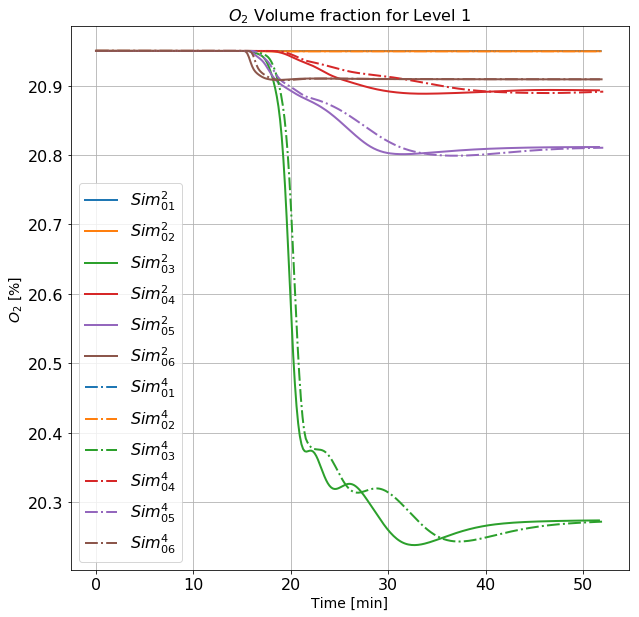

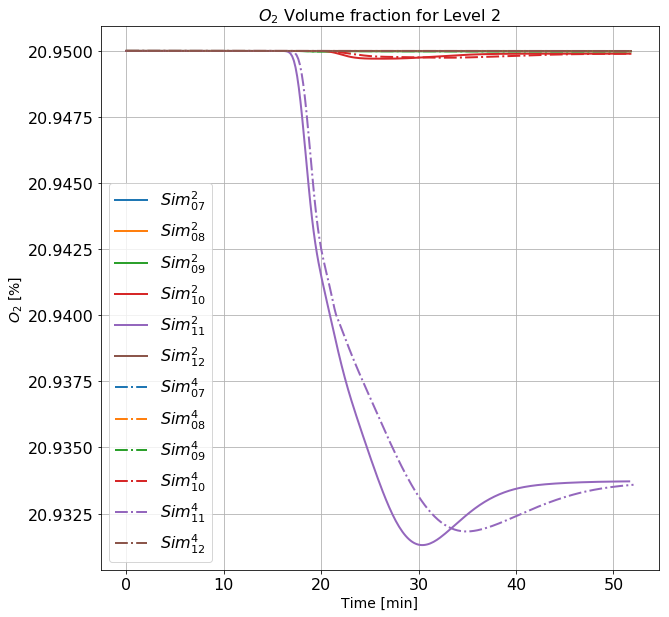

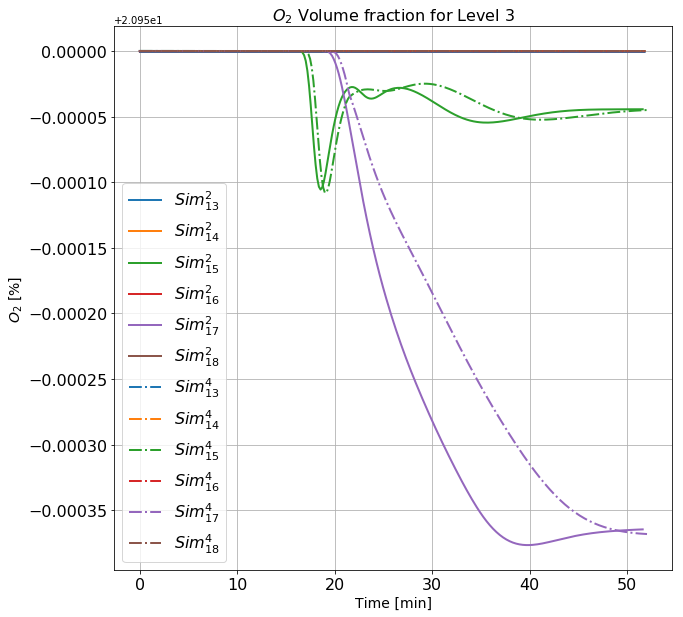

In [42]:
x_values_sim_2 = oxigen_data_sim_2['Time [min]']
x_values_sim_4 = oxigen_data_sim_4['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = oxigen_data_sim_2.columns[i]
        oxigen_values_sim_2 = oxigen_data_sim_2[header]*oxygen_fraction*100
        header = r'$Sim^2_{'+header[3:]+'}$'
        plt.plot(x_values_sim_2, oxigen_values_sim_2, label=r''+header, linewidth =2)
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:   
        header = oxigen_data_sim_4.columns[i]
        oxigen_values_sim_4 = oxigen_data_sim_4[header]*oxygen_fraction*100
        header = r'$Sim^4_{'+header[3:]+'}$'
        plt.plot(x_values_sim_4, oxigen_values_sim_4, label=r''+header, linewidth =2,linestyle='-.')
    plt.ylabel(r'$O_2$ [%]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'$O_2$ Volume fraction for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'O2_sims_level_'+str(j+1)+'.png')

## Temperature
### Note about the Temperature
Temperature results are in Kelvin. We substract 273.15 to get Celcius as the experimental data.

In [43]:
temperature_shif = 273.15

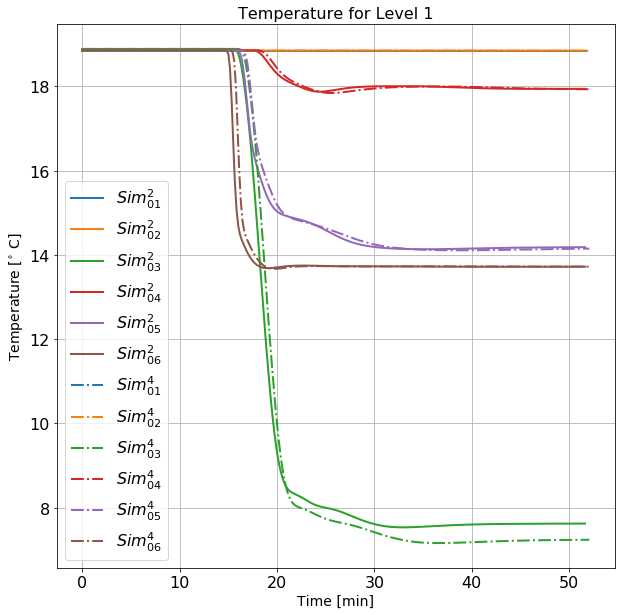

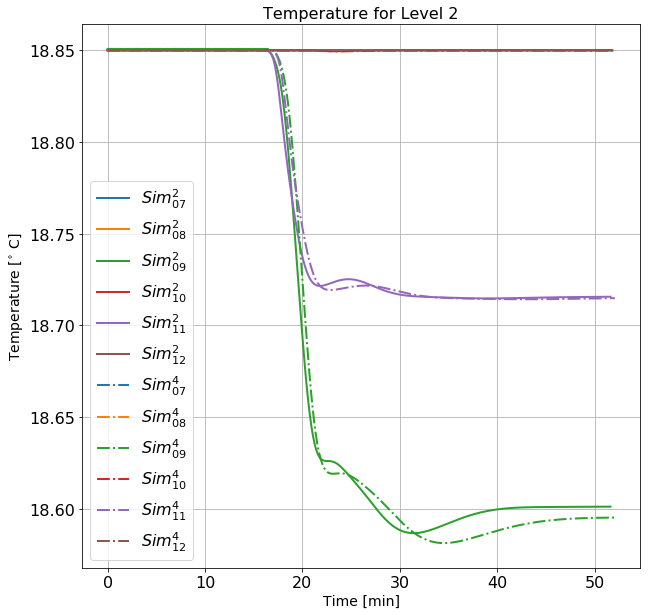

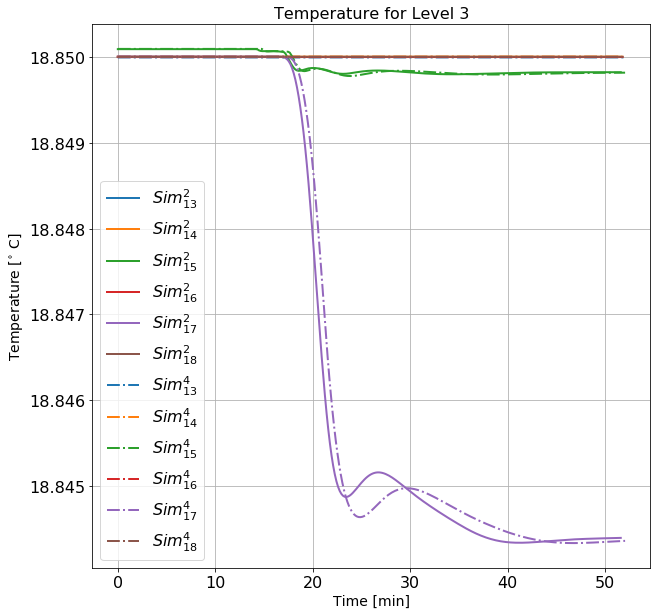

In [44]:
x_values_sim_2 = temperature_data_sim_2['Time [min]']
x_values_sim_4 = temperature_data_sim_4['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = temperature_data_sim_2.columns[i]
        temperature_values = temperature_data_sim_2[header] - temperature_shif
        header = r'$Sim^2_{'+header[5:]+'}$'
        plt.plot(x_values_sim_2, temperature_values, label=r''+header, linewidth =2)
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:
        header = temperature_data_sim_4.columns[i]
        temperature_values = temperature_data_sim_4[heawwwder] - temperature_shif
        header = r'$Sim^4_{'+header[5:]+'}$'
        plt.plot(x_values_sim_4, temperature_values, label=r''+header, linewidth =2, linestyle='-.')
    plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'Temperature for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'Temp_sims_level_'+str(j+1)+'.png')

## Plotting Simulation values and Experimental values together

## $O_2$ Levels

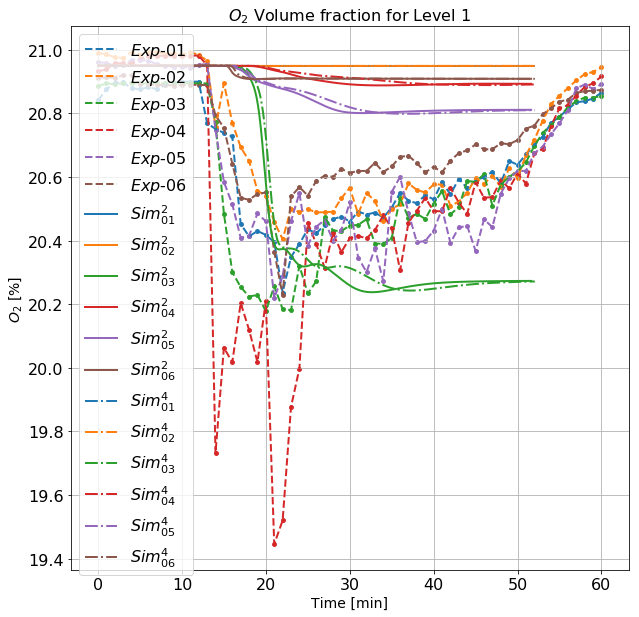

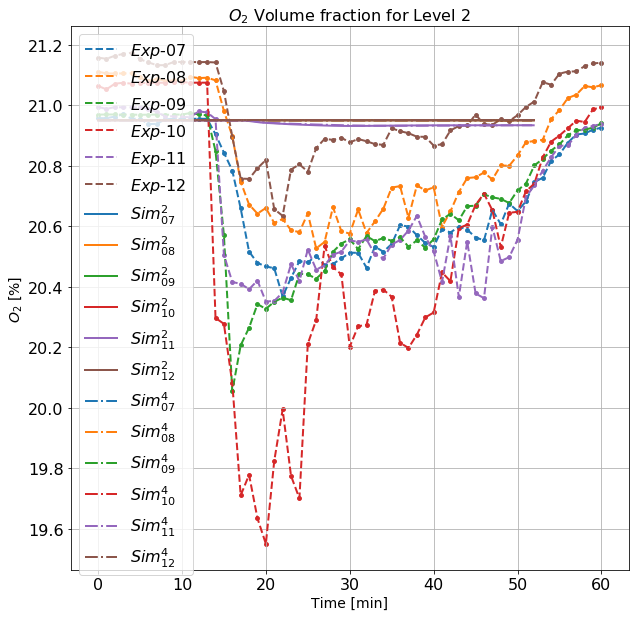

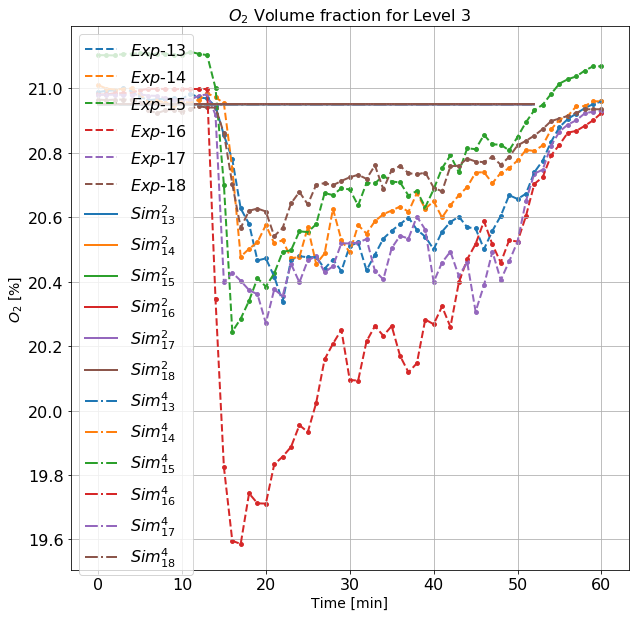

In [45]:
x_values_exp = oxigen_data['Time [min]']
x_values_sim_2 = temperature_data_sim_2['Time [min]']
x_values_sim_4 = temperature_data_sim_4['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = oxigen_data.columns[i]
        oxigen_values_exp = oxigen_data[header]
        header = r'$Exp$'+header[2:]
        plt.scatter(x_values_exp, oxigen_values_exp,s=15, label=None)#, label='Group '+str(group_number))
        plt.plot(x_values_exp, oxigen_values_exp, label=r''+header, linewidth =2,linestyle='--')
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:  
        header = oxigen_data_sim_2.columns[i]
        oxigen_values_sim = oxigen_data_sim_2[header]*oxygen_fraction*100
        header = r'$Sim^2_{'+header[3:]+'}$'
        plt.plot(x_values_sim_2, oxigen_values_sim, label=r''+header, linewidth =2)
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:   
        header = oxigen_data_sim_4.columns[i]
        oxigen_values_sim_4 = oxigen_data_sim_4[header]*oxygen_fraction*100
        header = r'$Sim^4_{'+header[3:]+'}$'
        plt.plot(x_values_sim_4, oxigen_values_sim_4, label=r''+header, linewidth =2,linestyle='-.')
    plt.ylabel(r'$O_2$ [%]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'$O_2$ Volume fraction for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'O2_exp_level_'+str(j+1)+'.png')

## Temperature levels

Temp_03 has NaN values
Temp_06 has NaN values
Temp_08 has NaN values
Temp_11 has NaN values
Temp_15 has NaN values
Temp_18 has NaN values


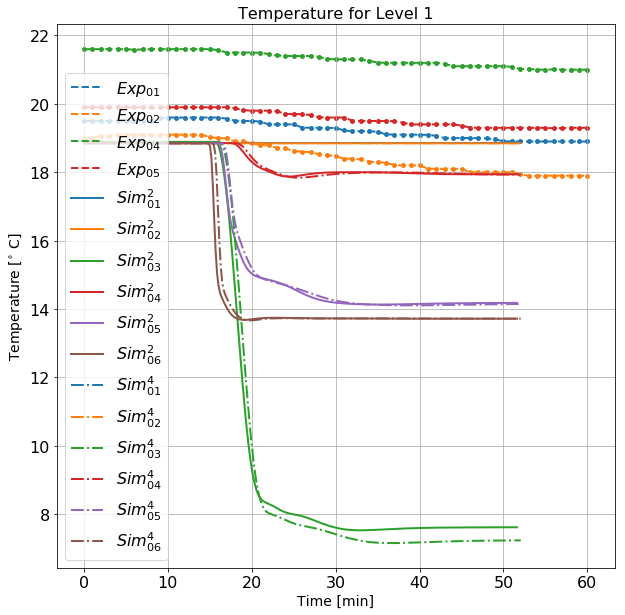

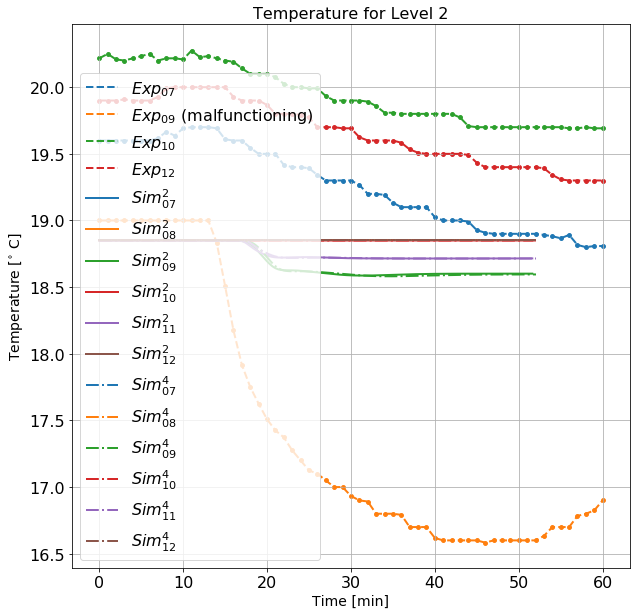

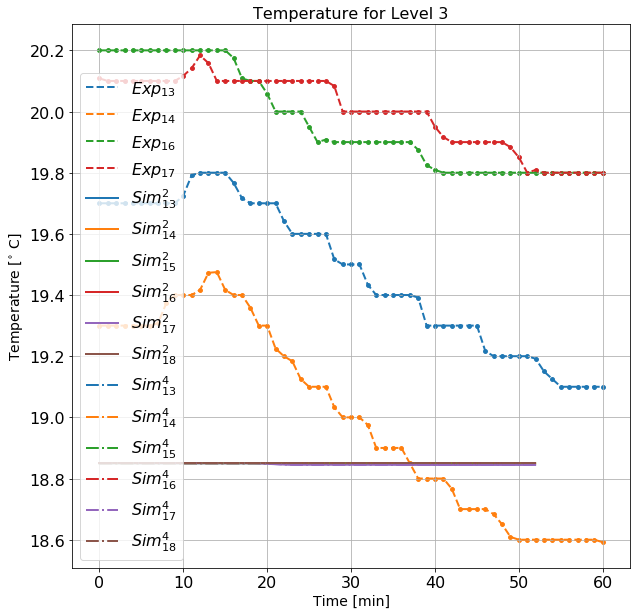

In [46]:
x_values_exp = temperature_data['Time [min]']
x_values_sim_2 = temperature_data_sim_2['Time [min]']
x_values_sim_4 = temperature_data_sim_4['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = temperature_data.columns[i]
        temperature_values = temperature_data[header]
        if(temperature_values.isnull().values.any()):
            print(header + ' has NaN values')
        else:
            if(header =='Temp_09'):
                header = r'$Exp_{'+header[5:]+'}$ (malfunctioning)'
            else:
                header = r'$Exp_{'+header[5:]+'}$'
            plt.scatter(x_values_exp, temperature_values,s=15, label=None)
            plt.plot(x_values_exp, temperature_values, label=r''+header, linewidth =2,linestyle='--')
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:  
        header = temperature_data_sim_2.columns[i]
        temperature_values = temperature_data_sim_2[header] - temperature_shif
        header = r'$Sim^2_{'+header[5:]+'}$'
        plt.plot(x_values_sim_2, temperature_values, label=r''+header, linewidth =2)
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:
        header = temperature_data_sim_4.columns[i]
        temperature_values = temperature_data_sim_4[header] - temperature_shif
        header = r'$Sim^4_{'+header[5:]+'}$'
        plt.plot(x_values_sim_4, temperature_values, label=r''+header, linewidth =2, linestyle='-.')
    plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'Temperature for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'Temp_exp_level_'+str(j+1)+'.png')

# Plotting the other simulation values

In [47]:
def plot_levels_simple(dataframe, levels, ylabel, title, legend_pre, save_fig, file_prefix):
    """Plots the given data frame per levels."""
    x_values_sim = dataframe['Time [min]']
    for j in range(np.shape(levels)[0]):
        detectors_level = levels[j]
        fig = plt.figure(figsize=(10,10))
        for i in detectors_level:
            header = dataframe.columns[i]
            y_values = dataframe[header]
            header = r'$'+legend_pre+'_{'+str(header)+'}$'
            plt.plot(x_values_sim, y_values, label=r''+header, linewidth =4)
        plt.ylabel(r''+ylabel,fontsize='14')
        plt.xlabel(r'Time [min]',fontsize='14')
        plt.tick_params(labelsize=16)
        plt.legend(fontsize='16')
        plt.grid()
        #plt.ylim(19.4,21.2)
        plt.title(r''+title+' for Level '+str(j+1), fontsize='16')
        plt.savefig(plots_folder+file_separator+file_prefix+'_level_'+str(j+1)+'.png')

In [89]:
want_to_plot_nitrogen = True
want_to_plot_nitrogen_densities = True
want_to_plot_pressures = False
want_to_plot_coordinates = False

In [49]:
save_fig=True

## Nitrogen Volume Fraction

In [50]:
nitrogen_fraction = 0.79
full_nitrogen_data_sim_4 = pd.DataFrame(columns=nitrogen_data_sim_4.columns)
full_nitrogen_data_sim_4['Time [min]'] = nitrogen_data_sim_4['Time [min]']

In [51]:
full_nitrogen_data_sim_4
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    for i in detectors_level:
        header_oxi = oxigen_data_sim_4.columns[i]
        header_nitro = nitrogen_data_sim_4.columns[i]
        full_nitrogen_data_sim_4[header_nitro] = (oxigen_data_sim_4[header_oxi]*nitrogen_fraction*100+nitrogen_data_sim_4[header_nitro]*100)

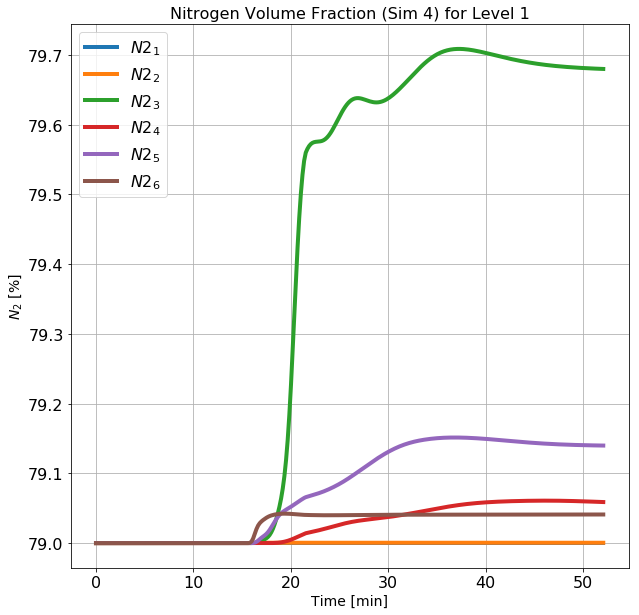

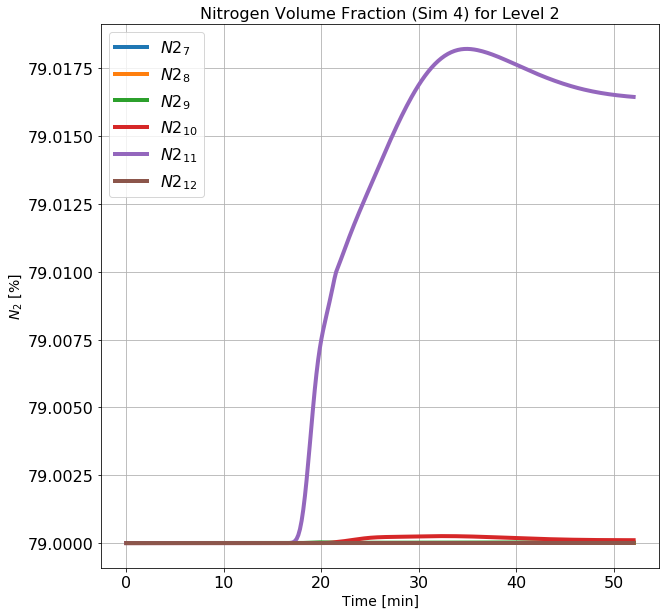

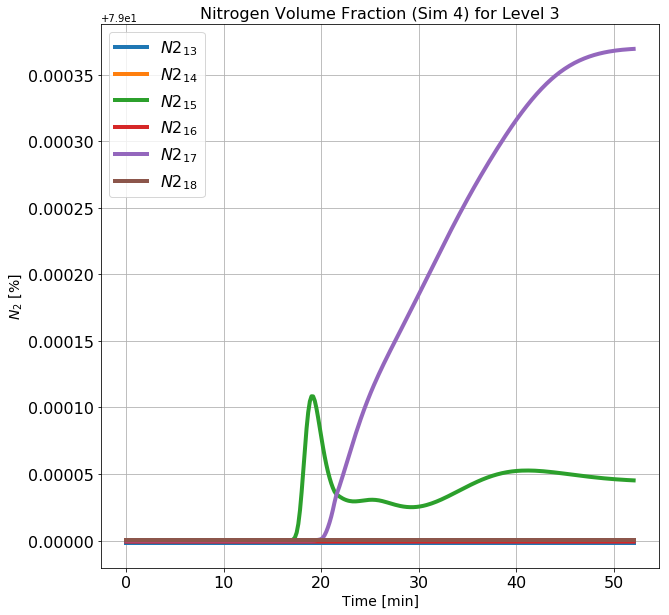

In [52]:
if(want_to_plot_nitrogen):
    plot_levels_simple(full_nitrogen_data_sim_4,levels,'$N_2$ [%]','Nitrogen Volume Fraction (Sim 4)','N2',save_fig,'N2_sims')

## Nitrogen - Air Density

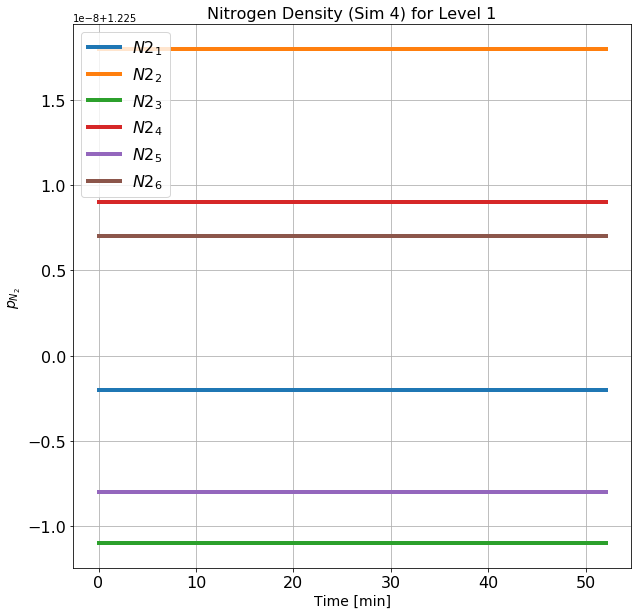

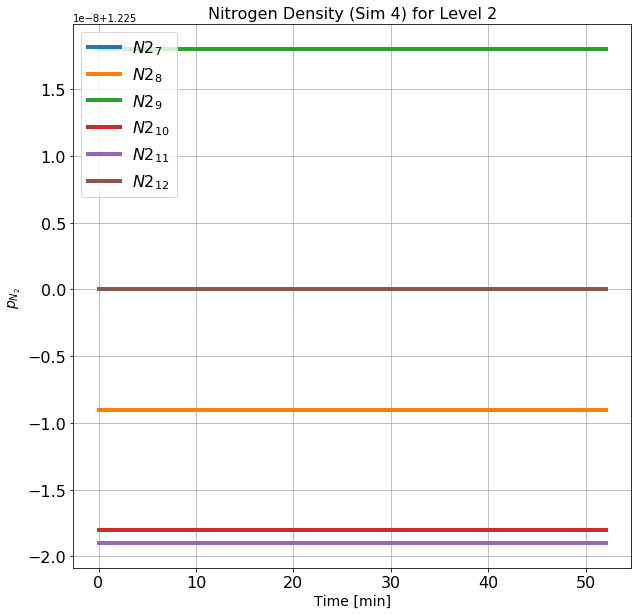

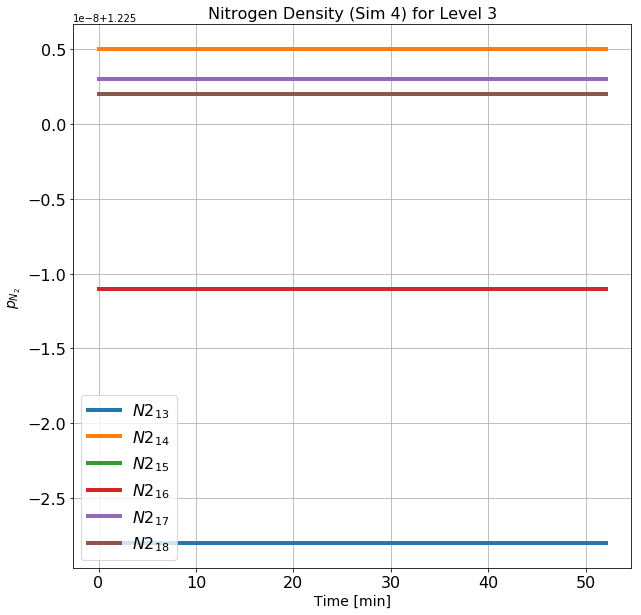

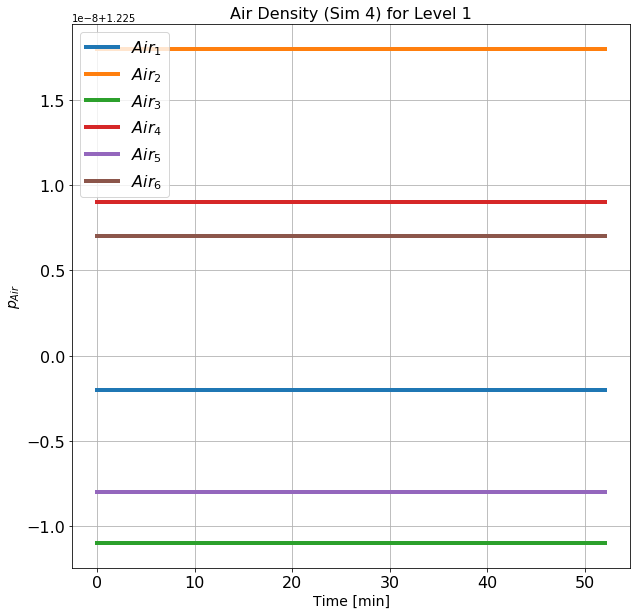

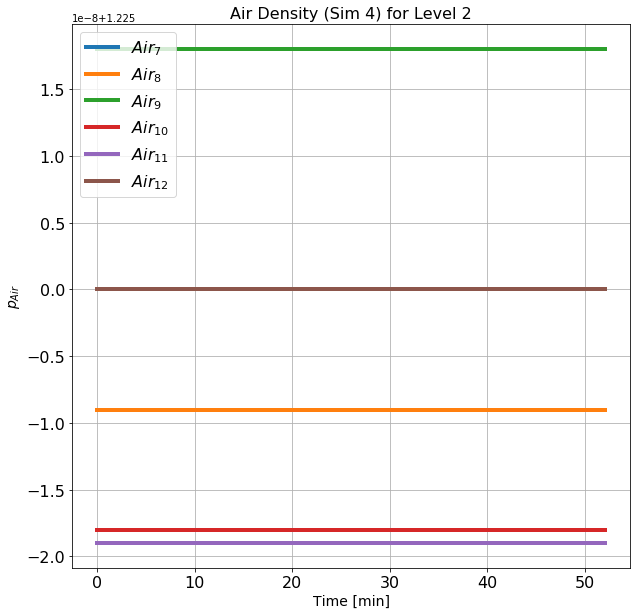

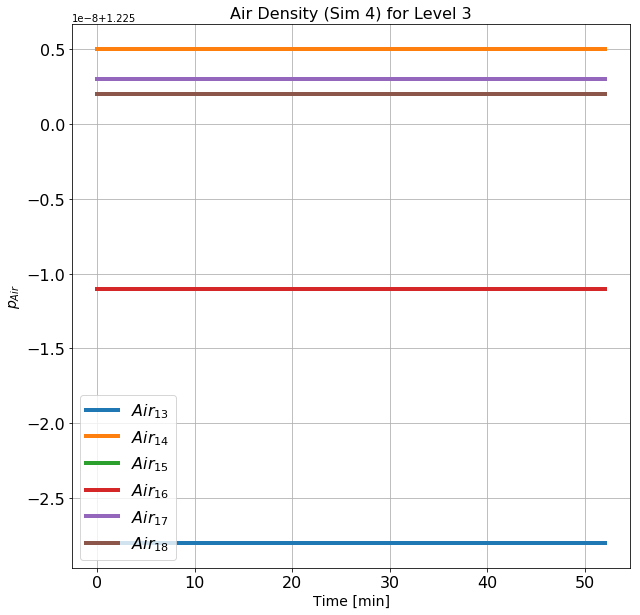

In [68]:
if(want_to_plot_nitrogen_densities):
    plot_levels_simple(nitrogen_density_data_sim_4,levels,'$p_{N_2}$ ','Nitrogen Density (Sim 4)','N2',save_fig,'N2_dens_sims')
    plot_levels_simple(nitrogen_density_data_sim_4,levels,'$p_{Air}$ ','Air Density (Sim 4)','Air',save_fig,'Air_dens_sims')

## Pressure

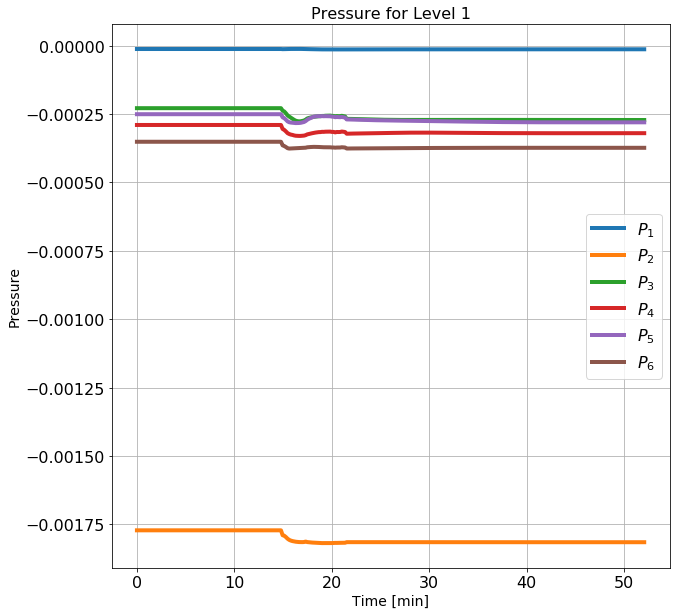

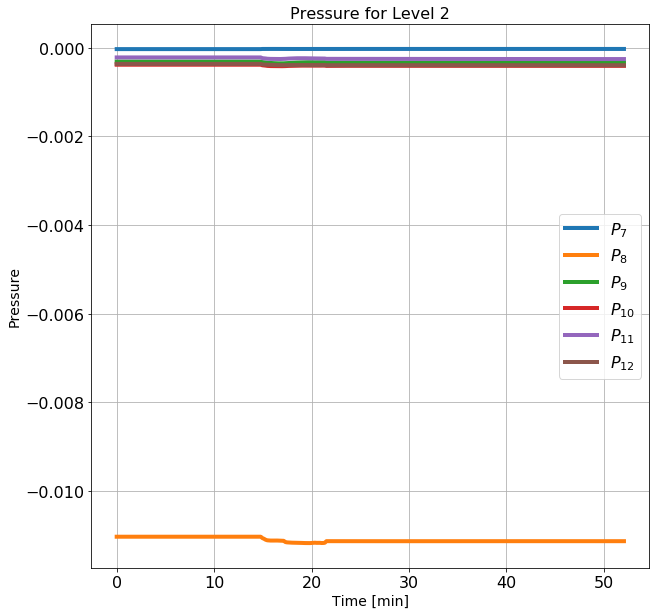

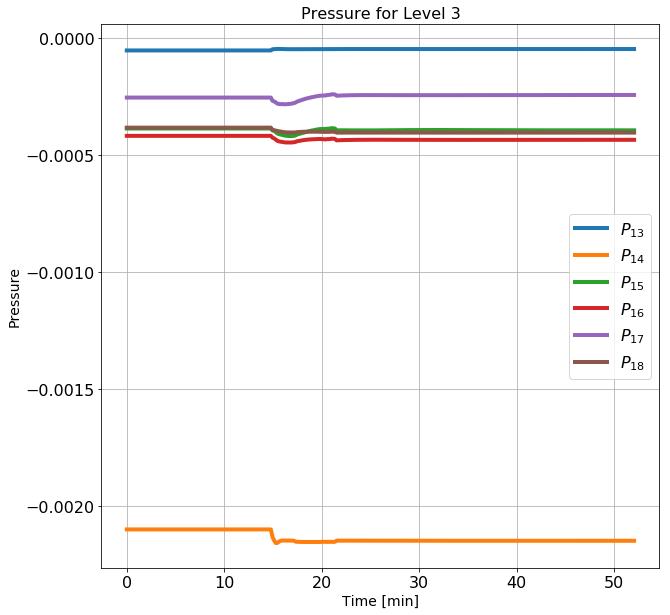

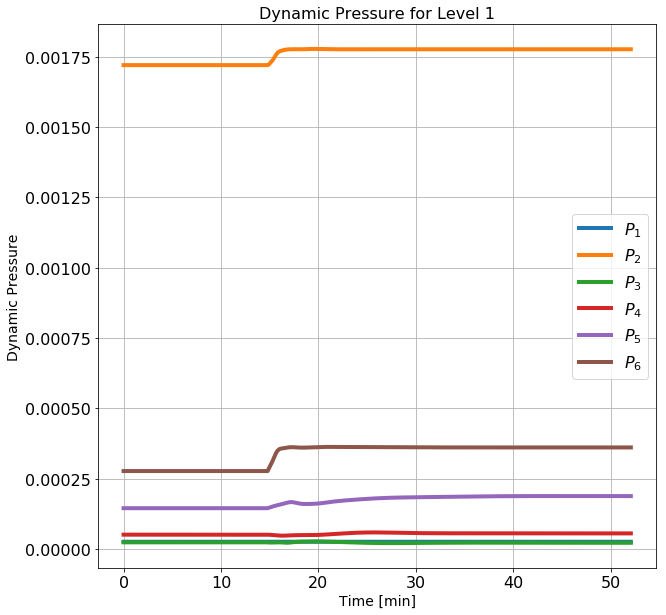

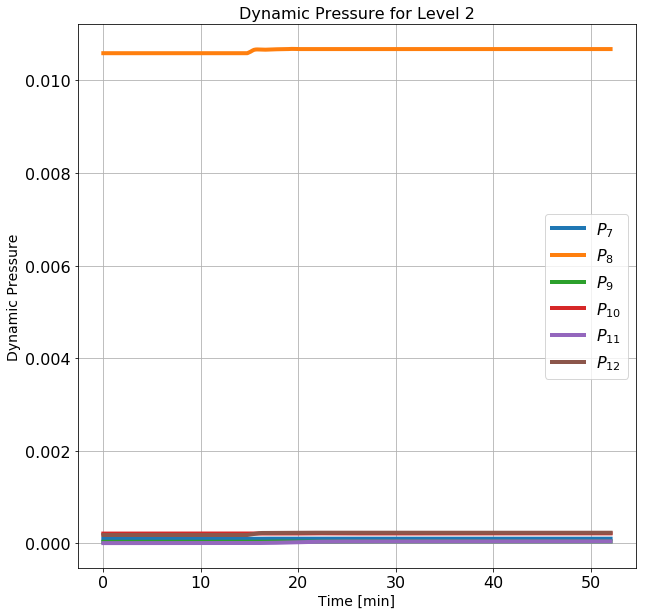

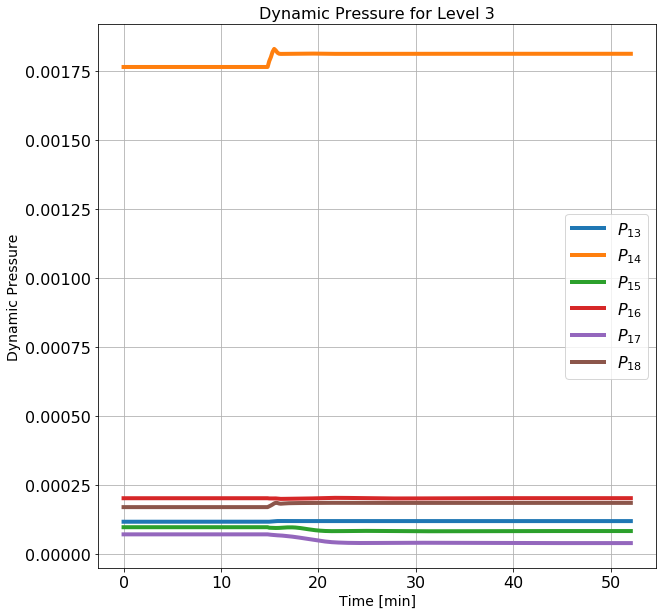

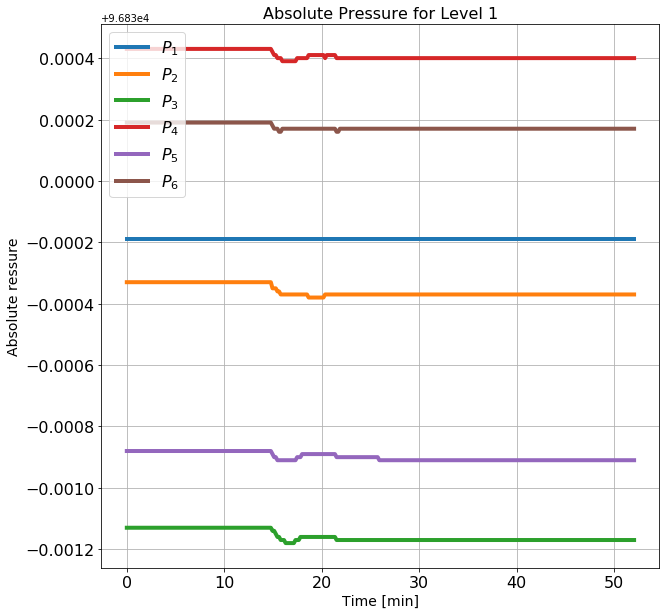

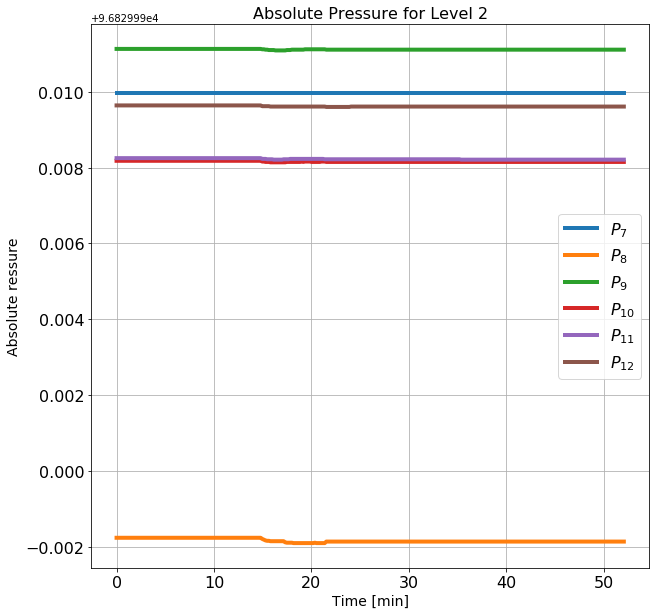

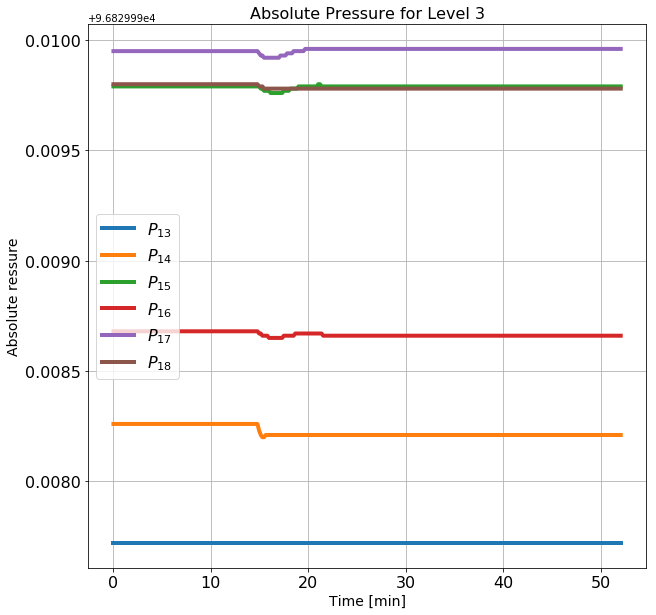

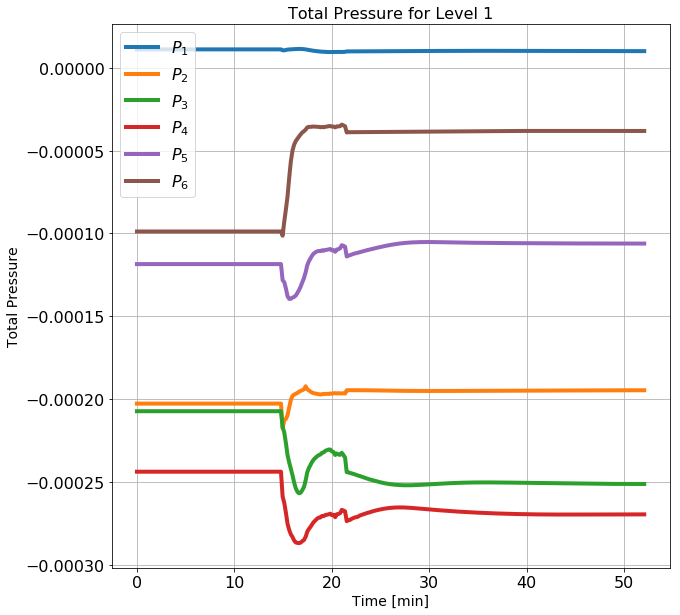

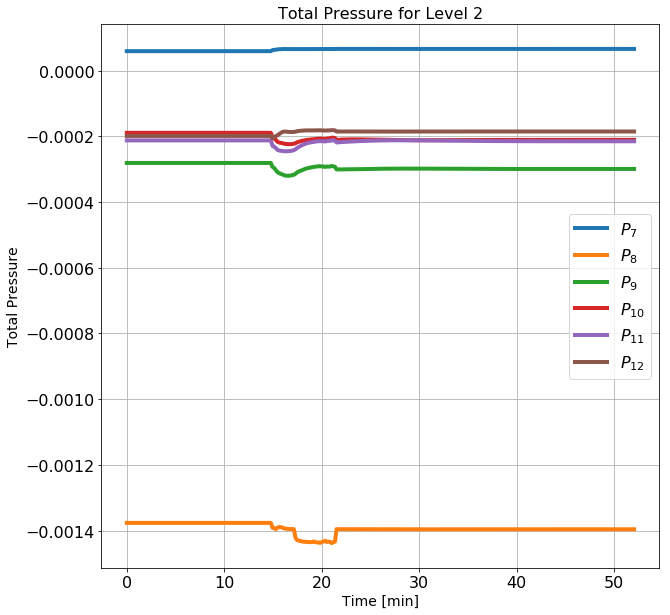

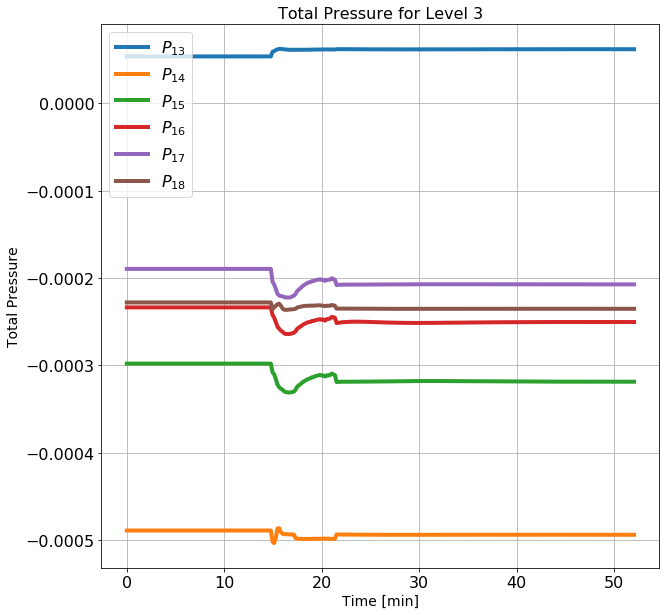

In [69]:
if(want_to_plot_pressures):
    plot_levels_simple(pressure_sim_4,levels,'Pressure','Pressure','P',save_fig,'P_sim_4')
    plot_levels_simple(dynamic_pressure_sim_4,levels,'Dynamic Pressure','Dynamic Pressure','P',save_fig,'DyP_sim_4')
    plot_levels_simple(absolute_pressure_sim_4,levels,'Absolute ressure','Absolute Pressure','P',save_fig,'AbP_sim_4')
    plot_levels_simple(total_pressure_sim_4,levels,'Total Pressure','Total Pressure','P',save_fig,'TotP_sim_4')

## Coordinates
### We plot them to visualize that they are constant

In [55]:
if(want_to_plot_coordinates):
    plot_levels_simple(x_coordinate_sim_4,levels,'X-coord','X-coord','X',save_fig,'x_sim_4')
    plot_levels_simple(y_coordinate_sim_4,levels,'Y-coord','Y-coord','Y',save_fig,'y_sim_4')
    plot_levels_simple(z_coordinate_sim_4,levels,'Z-coord','Z-coord','Z',save_fig,'z_sim_4')

## Verifying that Temp_Total and Temp are the same

In [56]:
diff_temp = temperature_data_sim_2 - temperature_total_data_sim_2

In [57]:
mean_diff = diff_temp.values.mean()
std_diff = diff_temp.values.std()

In [58]:
print(mean_diff,std_diff)

1.4069549182847497e-07 1.1683034253792858e-07


In [59]:
diff_temp = temperature_data_sim_4 - temperature_total_data_sim_4
mean_diff = diff_temp.values.mean()
std_diff = diff_temp.values.std()
print(mean_diff,std_diff)

1.402879387776054e-07 1.1879423996602847e-07


In [65]:
exp_data

,nodenumber,x-coordinate,y-coordinate,z-coordinate
0,1,0.45,1.18,0.7
1,2,2.64,2.09,0.7
2,3,4.85,1.93,0.7
3,4,6.55,1.15,0.7
4,5,4.77,0.26,0.7
5,6,3.04,0.25,0.7
6,7,0.45,1.18,1.3
7,8,2.64,2.09,1.3
8,9,4.85,1.93,1.3
9,10,6.55,1.15,1.3


# Averaging, Stds between simulations

In [81]:
full_oxygen = np.array([oxigen_data_sim_2.values[:-1,:],oxigen_data_sim_4.values])
full_temperature = np.array([temperature_data_sim_2.values[:-1,:],temperature_data_sim_4.values])

In [86]:
mean_oxy = np.nanmean(full_oxygen,axis=0)
std_oxy = np.nanstd(full_oxygen,axis=0)
mean_temp = np.nanmean(full_temperature,axis=0)
std_temp = np.nanstd(full_temperature,axis=0)

In [88]:
mean_oxigen_data_sim = pd.DataFrame(data=mean_oxy,columns=oxigen_data.columns)
std_oxigen_data_sim = pd.DataFrame(data=std_oxy,columns=oxigen_data.columns)
mean_temperature_data_sim = pd.DataFrame(data=mean_temp,columns=temperature_data.columns)
std_temperature_data_sim = pd.DataFrame(data=std_temp,columns=temperature_data.columns)

## $O_2$ Volume fraction

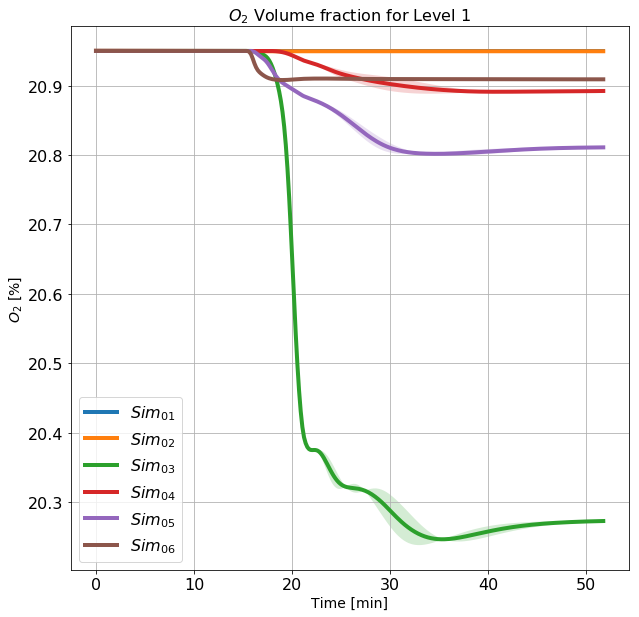

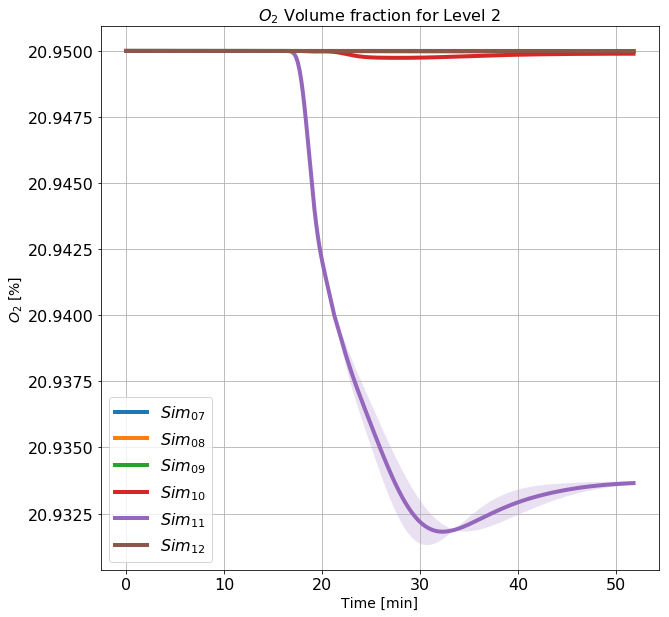

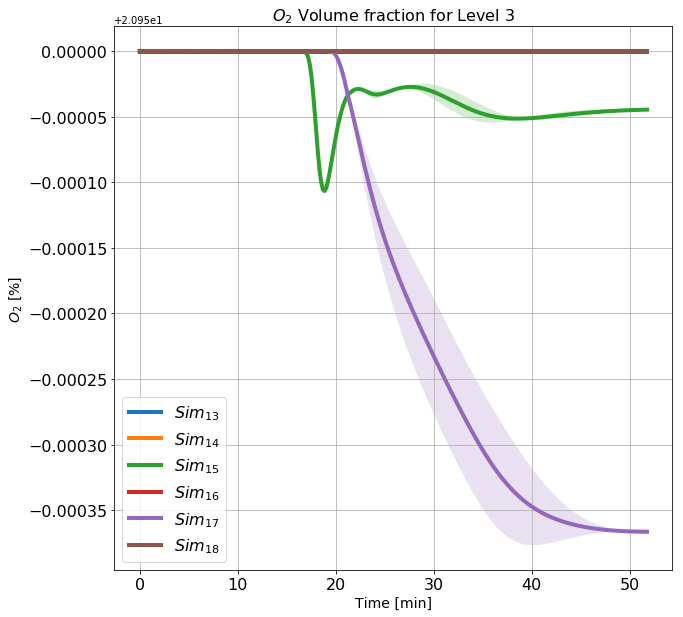

In [99]:
x_values_sim_mean = mean_oxigen_data_sim['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = mean_oxigen_data_sim.columns[i]
        mean_oxigen_values = mean_oxigen_data_sim[header]*oxygen_fraction*100
        std_oxigen_values = std_oxigen_data_sim[header]*oxygen_fraction*100
        header = r'$Sim_{'+header[3:]+'}$'
        plt.plot(x_values_sim_mean, mean_oxigen_values, label=r''+header+'', linewidth =4)
        plt.fill_between(x_values_sim_mean,mean_oxigen_values+std_oxigen_values,mean_oxigen_values-std_oxigen_values,alpha=0.2)#,label =r'$\sigma$ '+str(header)+'' )
    plt.ylabel(r'$O_2$ [%]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'$O_2$ Volume fraction for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'O2_mean_sims_level_'+str(j+1)+'.png')

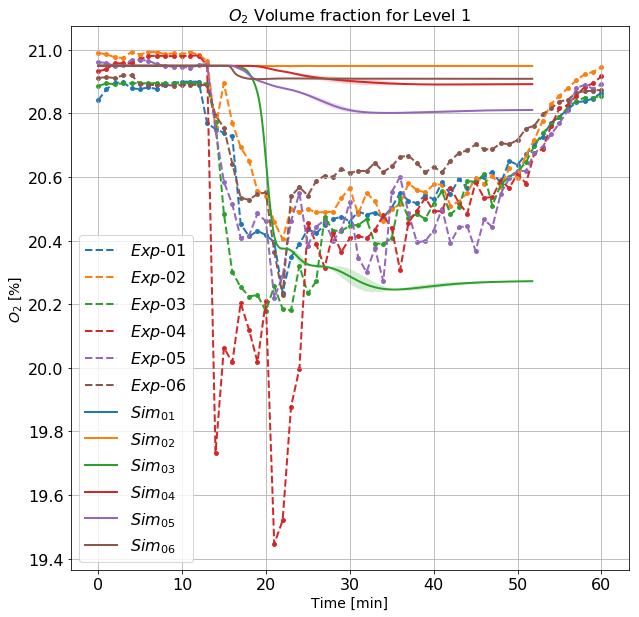

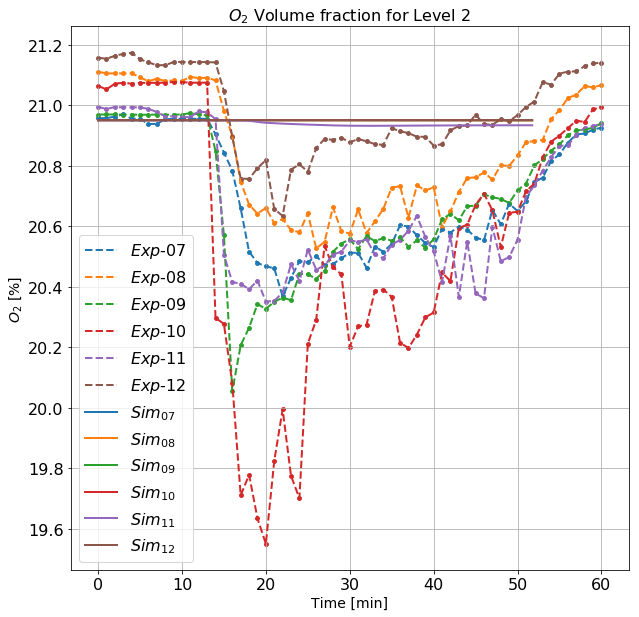

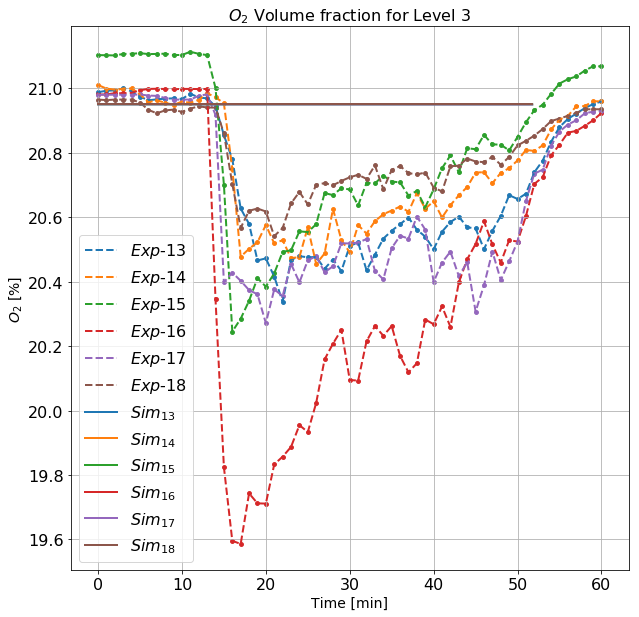

In [100]:
x_values_exp = oxigen_data['Time [min]']
x_values_sim_mean = mean_oxigen_data_sim['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = oxigen_data.columns[i]
        oxigen_values_exp = oxigen_data[header]
        header = r'$Exp$'+header[2:]
        plt.scatter(x_values_exp, oxigen_values_exp,s=15, label=None)#, label='Group '+str(group_number))
        plt.plot(x_values_exp, oxigen_values_exp, label=r''+header, linewidth =2,linestyle='--')
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:  
        header = mean_oxigen_data_sim.columns[i]
        mean_oxigen_values = mean_oxigen_data_sim[header]*oxygen_fraction*100
        std_oxigen_values = std_oxigen_data_sim[header]*oxygen_fraction*100
        header = r'$Sim_{'+header[3:]+'}$'
        plt.plot(x_values_sim_mean, mean_oxigen_values, label=r''+header+'', linewidth =2)
        plt.fill_between(x_values_sim_mean,mean_oxigen_values+std_oxigen_values,mean_oxigen_values-std_oxigen_values,alpha=0.2)
    plt.ylabel(r'$O_2$ [%]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'$O_2$ Volume fraction for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'mean_O2_val_level_'+str(j+1)+'.png')

## Temperature

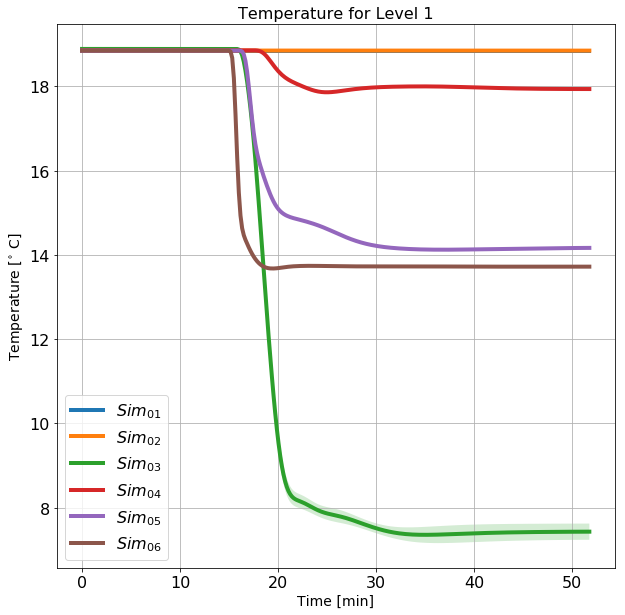

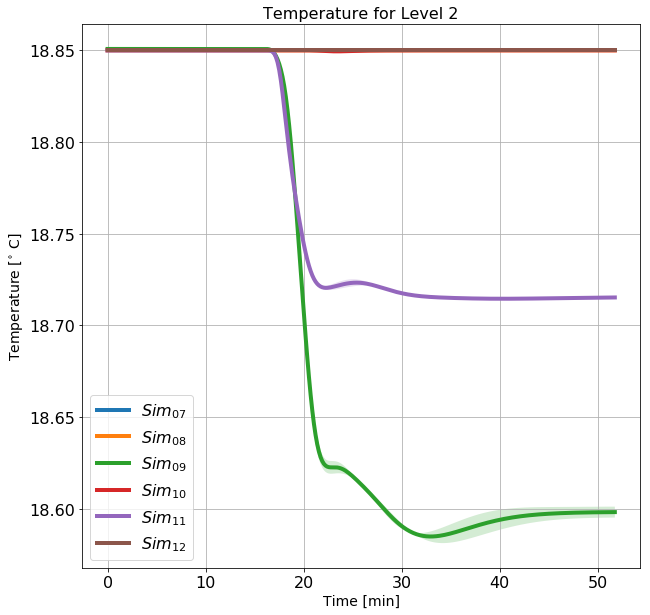

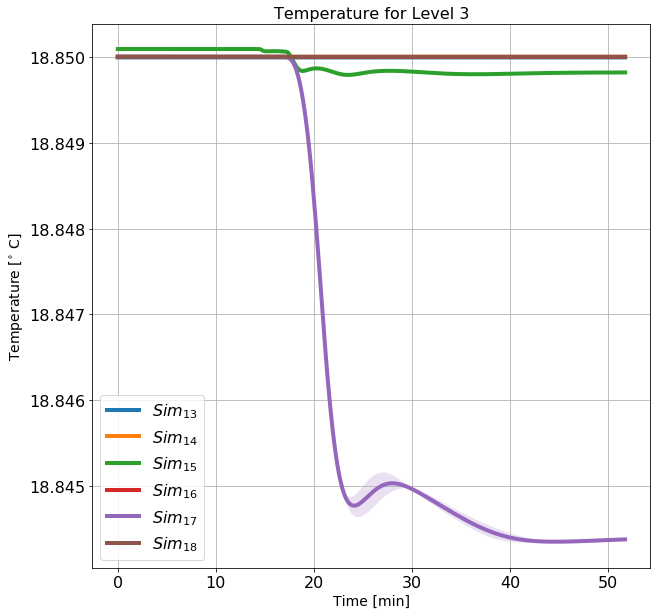

In [103]:
x_values_sim_mean = mean_temperature_data_sim['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = mean_temperature_data_sim.columns[i]
        mean_temp_values = mean_temperature_data_sim[header] - temperature_shif
        std_temp_values = std_temperature_data_sim[header]
        header = r'$Sim_{'+header[5:]+'}$'
        plt.plot(x_values_sim_mean, mean_temp_values, label=r''+header+'', linewidth =4)
        plt.fill_between(x_values_sim_mean,mean_temp_values+std_temp_values,mean_temp_values-std_temp_values,alpha=0.2)#,label =r'$\sigma$ '+str(header)+'' )
    plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'Temperature for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'Temp_mean_sims_level_'+str(j+1)+'.png')

Temp_03 has NaN values
Temp_06 has NaN values
Temp_08 has NaN values
Temp_11 has NaN values
Temp_15 has NaN values
Temp_18 has NaN values


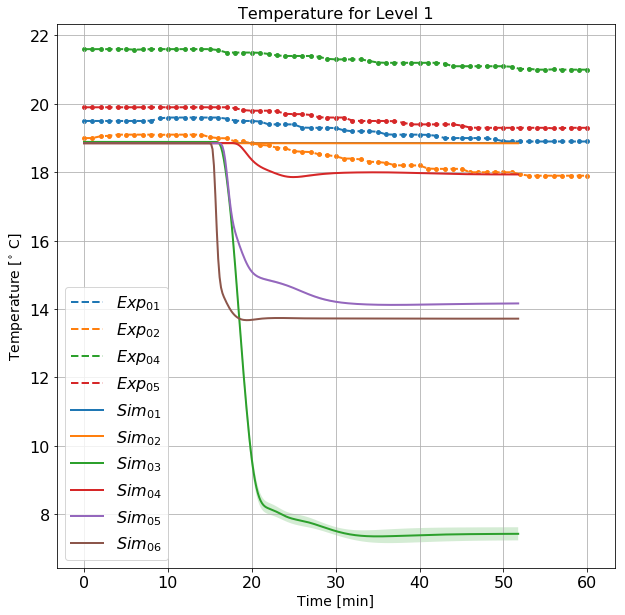

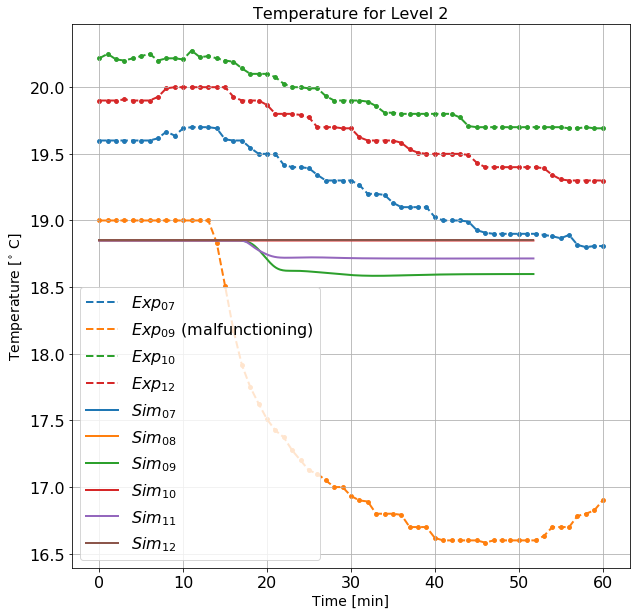

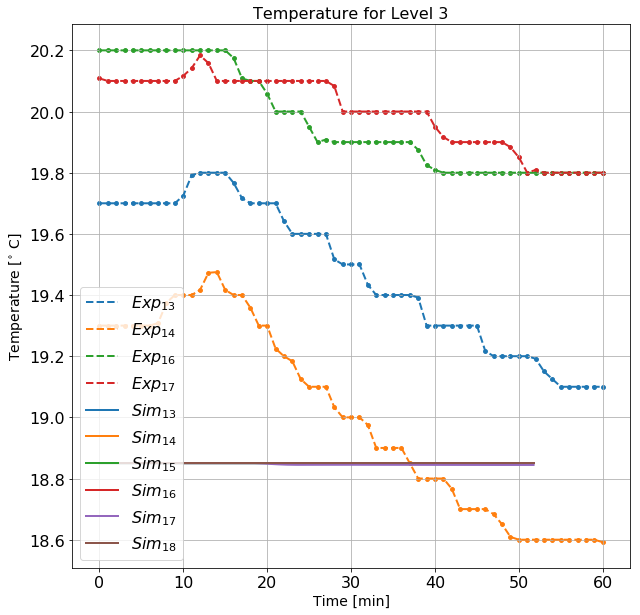

In [106]:
x_values_exp = temperature_data['Time [min]']
x_values_sim_mean = mean_temperature_data_sim['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = temperature_data.columns[i]
        temperature_values = temperature_data[header]
        if(temperature_values.isnull().values.any()):
            print(header + ' has NaN values')
        else:
            if(header =='Temp_09'):
                header = r'$Exp_{'+header[5:]+'}$ (malfunctioning)'
            else:
                header = r'$Exp_{'+header[5:]+'}$'
            plt.scatter(x_values_exp, temperature_values,s=15, label=None)
            plt.plot(x_values_exp, temperature_values, label=r''+header, linewidth =2,linestyle='--')
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:  
        header = mean_temperature_data_sim.columns[i]
        temperature_values = mean_temperature_data_sim[header] - temperature_shif
        std_temp_values = std_temperature_data_sim[header]
        header = r'$Sim_{'+header[5:]+'}$'
        plt.plot(x_values_sim_mean, temperature_values, label=r''+header, linewidth =2)
        plt.fill_between(x_values_sim_mean,temperature_values+std_temp_values,temperature_values-std_temp_values,alpha=0.2)
    plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'Temperature for Level '+str(j+1), fontsize='16')
    plt.savefig(plots_folder+file_separator+'Mean_Temp_val_level_'+str(j+1)+'.png')